In [49]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [50]:
def calc_nvt(symbol):
    # Get Into The Block blockchain data from CryptoCompare API
    url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day?api_key=faffd9561a88b875387fb603ac0763ee8f7ed54814e1d601358bd2657947280a&limit=2000&fsym=' + symbol
    data = requests.get(url).json()["Data"]["Data"]
    df = pd.DataFrame(data) 
    
    # Calculate 
    df['nvt'] = df['current_supply'] / df['transaction_count'] / df['average_transaction_value']
    
    # Get pricing data from CryptoCompare API
    price_url = 'https://min-api.cryptocompare.com/data/v2/histoday?tsym=USD&limit=2000&api_key=faffd9561a88b875387fb603ac0763ee8f7ed54814e1d601358bd2657947280a&fsym=' + symbol
    histo_data = requests.get(price_url).json()["Data"]["Data"]
    
    df_price = pd.DataFrame(histo_data)
    
    combined = df.set_index('time').join(df_price.set_index('time'), on='time')
    
    return combined

In [51]:
btc_df = calc_nvt('BTC')

In [52]:
btc_df

,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,...,current_supply,nvt,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,,,,,,,,,,,,,,
1424044800,1182,BTC,57556248,64734547,133087,265780,104632,59853557,210,7.026073,...,1.384509e+07,18.832961,240.03,228.01,233.27,115467.55,2.718768e+07,235.83,direct,
1424131200,1182,BTC,57680407,64878501,143954,271246,102988,59956545,212,7.790118,...,1.384881e+07,17.261636,247.17,232.03,235.83,116259.51,2.792688e+07,243.20,direct,
1424217600,1182,BTC,57806153,65011538,133037,249907,105719,60062264,225,8.137061,...,1.385299e+07,16.103597,245.51,231.70,243.20,99662.48,2.381302e+07,235.20,direct,
1424304000,1182,BTC,57913794,65127992,116454,214089,94552,60156816,153,7.526654,...,1.385714e+07,19.471567,244.11,234.87,235.20,66053.23,1.585247e+07,241.92,direct,
1424390400,1182,BTC,58034380,65253042,125050,247984,98714,60255530,163,8.039311,...,1.386109e+07,17.466254,247.76,238.83,241.92,83584.59,2.043485e+07,244.52,direct,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596412800,1182,BTC,669651689,700558520,520552,1087286,333753,555042635,12616,3.389980,...,1.845082e+07,16.307725,11476.29,10945.66,11063.50,42060.85,4.739950e+08,11234.73,direct,
1596499200,1182,BTC,670124390,701077657,519138,1001974,329032,555371667,12812,3.018986,...,1.845171e+07,18.575361,11415.16,11021.07,11234.73,35052.44,3.933018e+08,11194.18,direct,
1596585600,1182,BTC,670562334,701555961,478304,960098,291814,555663481,13494,3.404716,...,1.845251e+07,18.572414,11791.62,11095.47,11194.18,48146.58,5.553956e+08,11752.05,direct,


In [53]:
btc_df.columns

Index(['id', 'symbol', 'zero_balance_addresses_all_time',
       'unique_addresses_all_time', 'new_addresses', 'active_addresses',
       'transaction_count', 'transaction_count_all_time',
       'large_transaction_count', 'average_transaction_value', 'block_height',
       'hashrate', 'difficulty', 'block_time', 'block_size', 'current_supply',
       'nvt', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol'],
      dtype='object')

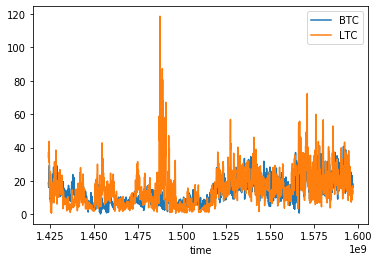

In [54]:
coin_list = ['BTC', 'LTC']
nvt_df = pd.DataFrame()
for coin in coin_list:
    df = calc_nvt(coin)
    nvt_df[coin] = df['nvt']
nvt_df.plot()

In [55]:
btc_df.reset_index(inplace = True)

In [56]:
btc_df

,time,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,...,current_supply,nvt,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1424044800,1182,BTC,57556248,64734547,133087,265780,104632,59853557,210,...,1.384509e+07,18.832961,240.03,228.01,233.27,115467.55,2.718768e+07,235.83,direct,
1,1424131200,1182,BTC,57680407,64878501,143954,271246,102988,59956545,212,...,1.384881e+07,17.261636,247.17,232.03,235.83,116259.51,2.792688e+07,243.20,direct,
2,1424217600,1182,BTC,57806153,65011538,133037,249907,105719,60062264,225,...,1.385299e+07,16.103597,245.51,231.70,243.20,99662.48,2.381302e+07,235.20,direct,
3,1424304000,1182,BTC,57913794,65127992,116454,214089,94552,60156816,153,...,1.385714e+07,19.471567,244.11,234.87,235.20,66053.23,1.585247e+07,241.92,direct,
4,1424390400,1182,BTC,58034380,65253042,125050,247984,98714,60255530,163,...,1.386109e+07,17.466254,247.76,238.83,241.92,83584.59,2.043485e+07,244.52,direct,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1596412800,1182,BTC,669651689,700558520,520552,1087286,333753,555042635,12616,...,1.845082e+07,16.307725,11476.29,10945.66,11063.50,42060.85,4.739950e+08,11234.73,direct,
1996,1596499200,1182,BTC,670124390,701077657,519138,1001974,329032,555371667,12812,...,1.845171e+07,18.575361,11415.16,11021.07,11234.73,35052.44,3.933018e+08,11194.18,direct,
1997,1596585600,1182,BTC,670562334,701555961,478304,960098,291814,555663481,13494,...,1.845251e+07,18.572414,11791.62,11095.47,11194.18,48146.58,5.553956e+08,11752.05,direct,
1998,1596672000,1182,BTC,671123805,702112868,556907,1130815,356612,556020093,14340,...,1.845351e+07,15.446674,11909.81,11577.80,11752.05,49916.86,5.870338e+08,11771.27,direct,


In [57]:
btc_df['time'] = pd.to_datetime(btc_df['time'], unit = 's')


In [58]:
btc_df

,time,id,symbol,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,...,current_supply,nvt,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,2015-02-16,1182,BTC,57556248,64734547,133087,265780,104632,59853557,210,...,1.384509e+07,18.832961,240.03,228.01,233.27,115467.55,2.718768e+07,235.83,direct,
1,2015-02-17,1182,BTC,57680407,64878501,143954,271246,102988,59956545,212,...,1.384881e+07,17.261636,247.17,232.03,235.83,116259.51,2.792688e+07,243.20,direct,
2,2015-02-18,1182,BTC,57806153,65011538,133037,249907,105719,60062264,225,...,1.385299e+07,16.103597,245.51,231.70,243.20,99662.48,2.381302e+07,235.20,direct,
3,2015-02-19,1182,BTC,57913794,65127992,116454,214089,94552,60156816,153,...,1.385714e+07,19.471567,244.11,234.87,235.20,66053.23,1.585247e+07,241.92,direct,
4,2015-02-20,1182,BTC,58034380,65253042,125050,247984,98714,60255530,163,...,1.386109e+07,17.466254,247.76,238.83,241.92,83584.59,2.043485e+07,244.52,direct,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-08-03,1182,BTC,669651689,700558520,520552,1087286,333753,555042635,12616,...,1.845082e+07,16.307725,11476.29,10945.66,11063.50,42060.85,4.739950e+08,11234.73,direct,
1996,2020-08-04,1182,BTC,670124390,701077657,519138,1001974,329032,555371667,12812,...,1.845171e+07,18.575361,11415.16,11021.07,11234.73,35052.44,3.933018e+08,11194.18,direct,
1997,2020-08-05,1182,BTC,670562334,701555961,478304,960098,291814,555663481,13494,...,1.845251e+07,18.572414,11791.62,11095.47,11194.18,48146.58,5.553956e+08,11752.05,direct,
1998,2020-08-06,1182,BTC,671123805,702112868,556907,1130815,356612,556020093,14340,...,1.845351e+07,15.446674,11909.81,11577.80,11752.05,49916.86,5.870338e+08,11771.27,direct,


In [59]:
btc_df.columns

Index(['time', 'id', 'symbol', 'zero_balance_addresses_all_time',
       'unique_addresses_all_time', 'new_addresses', 'active_addresses',
       'transaction_count', 'transaction_count_all_time',
       'large_transaction_count', 'average_transaction_value', 'block_height',
       'hashrate', 'difficulty', 'block_time', 'block_size', 'current_supply',
       'nvt', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'conversionType', 'conversionSymbol'],
      dtype='object')

In [60]:
btc_df.drop(columns=['id', 'zero_balance_addresses_all_time', 'unique_addresses_all_time', 'block_height', 'block_time', 'current_supply', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'conversionType', 'conversionSymbol'], inplace = True)

In [61]:
btc_df

,time,symbol,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,hashrate,difficulty,block_size,nvt,close
0,2015-02-16,BTC,133087,265780,104632,59853557,210,7.026073,3.588088e+05,4.445542e+10,414953,18.832961,235.83
1,2015-02-17,BTC,143954,271246,102988,59956545,212,7.790118,3.365568e+05,4.445542e+10,445682,17.261636,243.20
2,2015-02-18,BTC,133037,249907,105719,60062264,225,8.137061,3.721615e+05,4.445542e+10,361059,16.103597,235.20
3,2015-02-19,BTC,116454,214089,94552,60156816,153,7.526654,3.684745e+05,4.445542e+10,315926,19.471567,241.92
4,2015-02-20,BTC,125050,247984,98714,60255530,163,8.039311,3.489033e+05,4.445542e+10,382549,17.466254,244.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2020-08-03,BTC,520552,1087286,333753,555042635,12616,3.389980,1.362420e+08,1.684756e+13,1326875,16.307725,11234.73
1996,2020-08-04,BTC,519138,1001974,329032,555371667,12812,3.018986,1.216002e+08,1.684756e+13,1310942,18.575361,11194.18
1997,2020-08-05,BTC,478304,960098,291814,555663481,13494,3.404716,1.090332e+08,1.684756e+13,1267972,18.572414,11752.05
1998,2020-08-06,BTC,556907,1130815,356612,556020093,14340,3.350025,1.316743e+08,1.684756e+13,1277008,15.446674,11771.27


In [62]:
btc_df['sma200'] = btc_df.close.rolling(window=200).mean()

In [63]:
btc_df['mayer_multiple'] = btc_df.close / btc_df.sma200

In [69]:
btc_df.iloc[300:500]

,time,symbol,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,hashrate,difficulty,block_size,nvt,close,sma200,mayer_multiple
300,2015-12-13,BTC,223901,478309,189914,97547012,4596,27.422816,5.664512e+05,7.910238e+10,688830,2.871775,434.69,276.48730,1.572188
301,2015-12-14,BTC,268221,529504,231477,97778489,3378,20.951454,7.657807e+05,7.910238e+10,629963,3.084885,442.00,277.51070,1.592731
302,2015-12-15,BTC,262442,495422,223998,98002487,3544,19.457605,7.177623e+05,7.910238e+10,621391,3.433684,462.65,278.63880,1.660393
303,2015-12-16,BTC,254823,483830,220420,98222907,3994,20.102947,6.443927e+05,7.910238e+10,676312,3.378324,453.98,279.74260,1.622849
304,2015-12-17,BTC,245976,457925,216297,98439204,3963,19.317898,6.136629e+05,7.910238e+10,676607,3.583555,455.53,280.87105,1.621847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2016-06-25,BTC,222765,531079,206919,138542876,2616,10.253205,1.692054e+06,2.094532e+11,792597,7.399965,663.52,453.43590,1.463316
496,2016-06-26,BTC,195779,502812,181348,138724224,2308,9.878356,1.528578e+06,2.094532e+11,762231,8.765834,625.41,454.48295,1.376091
497,2016-06-27,BTC,235894,485116,217029,138941253,2827,9.999087,1.529103e+06,2.094532e+11,777207,7.237926,644.66,455.62880,1.414880
498,2016-06-28,BTC,249914,542750,212607,139153860,2587,8.775633,1.547033e+06,2.094532e+11,760032,8.420513,644.89,456.60410,1.412361
